<a href="https://colab.research.google.com/github/Estrelliita/RISC-V-Disassembler/blob/main/%5BS25_ML%5D_Visualizing_a_simple_task_grade_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS 5361/6361 Machine Learning - Visualizing a Simple ML Task**

<h1 style="font-size:10em">Predicting who will pass a course</h1>

**Author:** Olac Fuentes<br>
Computer Science Department<br>
University of Texas at El Paso<br>
**Last modified:** 1/21/2025<br>

A professor wants to know who among his students are likely to pass the class from their performance in the first part of the semester.

The professor has data indicating, for every student in the previous semester, the student's grades on the first two exams and the final course grade.

The professor wants to:

1. Build a model to predict, as accurately as possible, the final grade of every student in the current semester given his/her results on the first two exams, taking advantage of the data from the previous semester.
2. Estimate how accurate the model's predictions will be.

In this notebook we will show how we can help the professor solve the problem.



First, we will import the necessary libraries.

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

Since we don't have permission to use real student data, we will create a random dataset using a function from the sklearn library. The documentation of the function to generate the data can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html


In [ ]:
# Create artificial dataset with two features
X, y = make_blobs(n_samples = [20,40,40,100],random_state=2, centers = [[35,30],[40,60],[70,40],[65,80]],cluster_std = [10,10,10,15])
y = np.int16(y==3)
print(f'{X.shape =}, {y.shape=}')

X.shape =(200, 2), y.shape=(200,)


In [ ]:
X[:10]

array([[ 78.97831037, 102.02498199],
       [ 85.75671552,  82.22523865],
       [ 38.10530735,  59.22781335],
       [ 68.85578703,  35.01825806],
       [ 48.51054036,  69.77704033],
       [ 62.49246838,  71.35083605],
       [ 77.51964849,  30.06239017],
       [ 36.86491803,  67.71011738],
       [ 49.07951384,  78.37224764],
       [ 43.81866234,  65.66275441]])

In [ ]:
y[:10]

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0], dtype=int16)

Here, $X$ is a 200-by-2 array, representing 200 instances, each with two features (the results for exams 1 and 2), and $y$ is a 1-D array of length 200 containing the class of the instances in the dataset. Thus, for $0\leq i <200$,
$X[i,0]$ is the grade student $i$ obtained in exam 1, $X[i,1]$ is the grade for exam 2 and
$y[i]$ is student $i$'s final result, $y[i]=1$ means the student passed the course and  $y[i]=0$ means he/she did not.


We will now display the instances in the dataset. The $i$th instance is represented by a point with coordinates $\langle X[i,0], X[i,1] \rangle$ and its color is defined by its class, red for class 0, green for class 1, and blue for class 2.


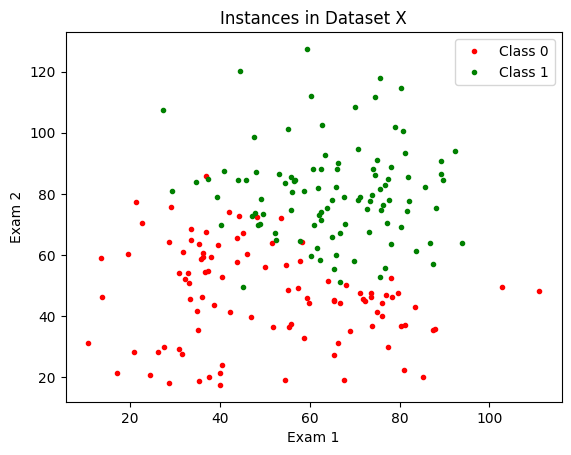

In [ ]:
colors = 'rg'
classes = sorted(set(y))
plt.figure()
for c in classes:
  ind = (y==c)
  plt.plot(X[ind,0],X[ind,1],'.'+colors[c],label = 'Class '+str(c))
plt.xlabel("Exam 1")
plt.ylabel("Exam 2")
plt.legend()
plt.title('Instances in Dataset X')
plt.show()

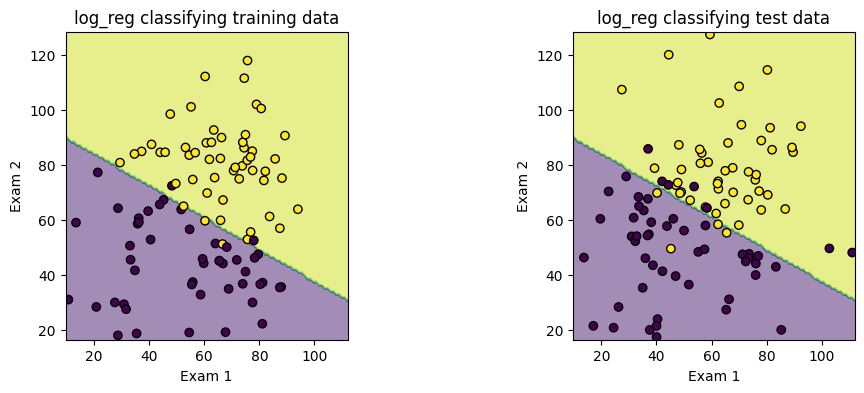

Prediction accuracy on training set: 0.9500
Prediction accuracy on test set:     0.8900


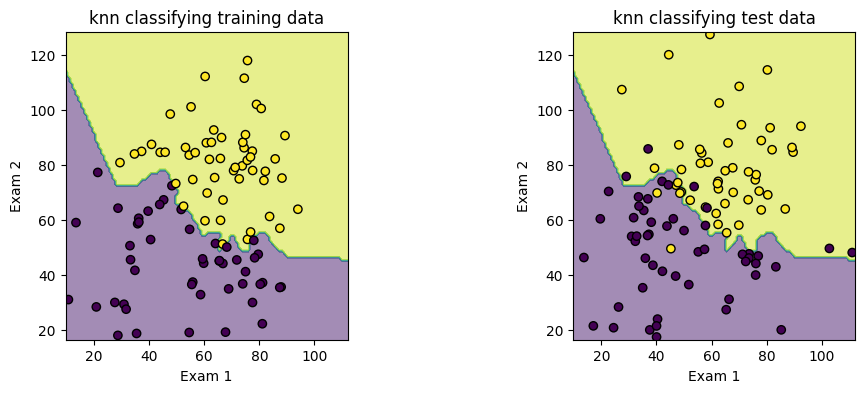

Prediction accuracy on training set: 1.0000
Prediction accuracy on test set:     0.8600


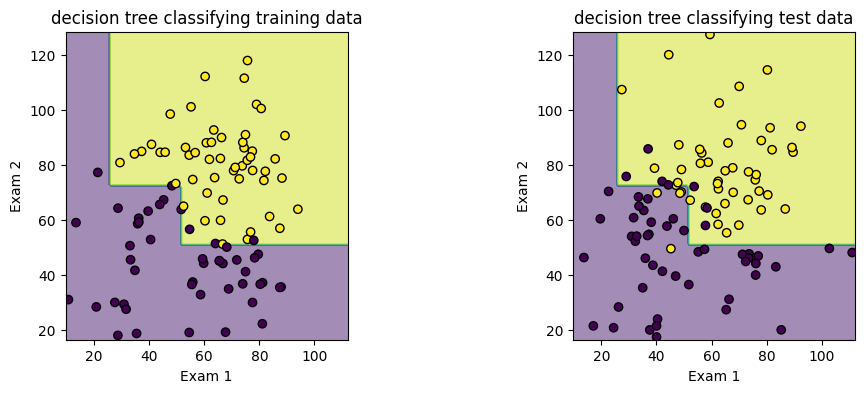

Prediction accuracy on training set: 0.9700
Prediction accuracy on test set:     0.8900


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
classifiers = {'log_reg' : LogisticRegression(),
               'knn': KNeighborsClassifier(n_neighbors=1,weights='distance'),
               'decision tree': DecisionTreeClassifier(max_depth=3)}

for c in classifiers:
    classifier = classifiers[c]
    classifier.fit(X_train, y_train)

    fig, ax = plt.subplots(1,2,figsize=(12, 4))

    disp = DecisionBoundaryDisplay.from_estimator(
      classifier, X, response_method="predict",
      xlabel="Exam 1", ylabel="Exam 2",ax=ax[0],alpha=0.5)
    disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k")
    ax[0].set_title(c+' classifying training data')
    ax[0].set_aspect('equal')

    disp = DecisionBoundaryDisplay.from_estimator(
      classifier, X, response_method="predict",
      xlabel="Exam 1", ylabel="Exam 2",ax=ax[1],alpha=0.5)
    disp.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k")
    ax[1].set_title(c+' classifying test data')
    ax[1].set_aspect('equal')
    plt.show()

    pred = classifier.predict(X_train)
    print(f'Prediction accuracy on training set: {accuracy_score(y_train,pred):6.4f}')
    pred = classifier.predict(X_test)
    print(f'Prediction accuracy on test set:     {accuracy_score(y_test,pred):6.4f}')

What can you say about the decision boundaries found by each of the algorithms? Which of the algorithms would you recommend for this application?

Now let's run the process again with different random seeds.

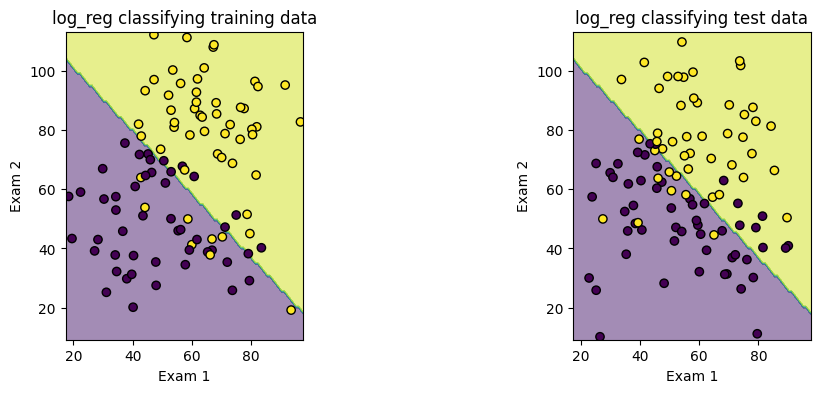

Prediction accuracy on training set: 0.8400
Prediction accuracy on test set:     0.8100


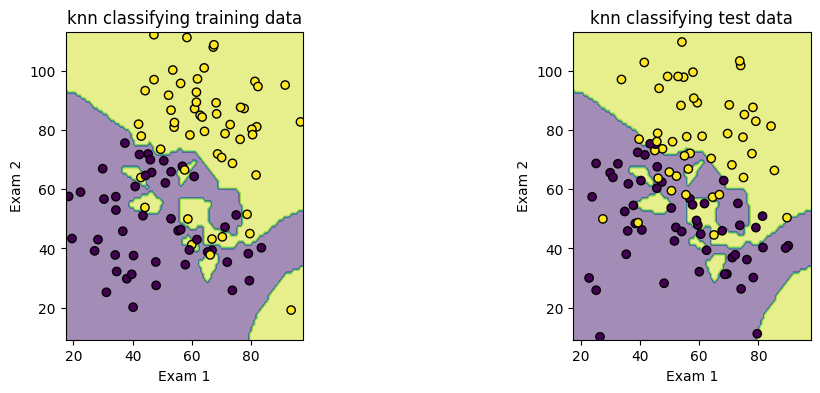

Prediction accuracy on training set: 1.0000
Prediction accuracy on test set:     0.7700


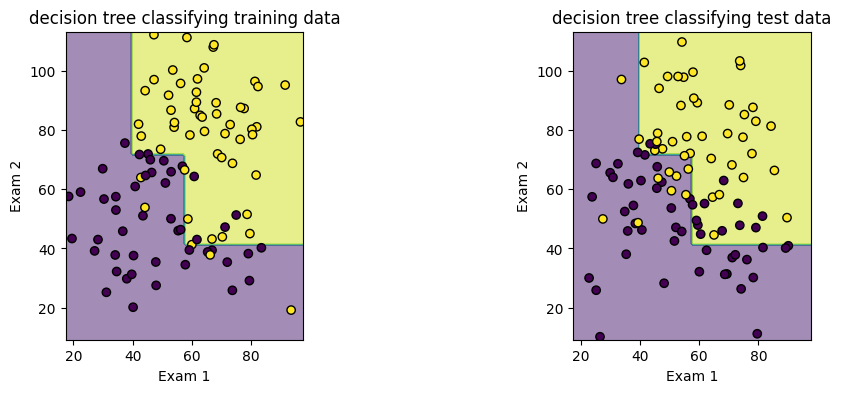

Prediction accuracy on training set: 0.9200
Prediction accuracy on test set:     0.7600


In [ ]:
X, y = make_blobs(n_samples = [20,40,40,100],centers = [[35,30],[40,60],[70,40],[65,80]],cluster_std = [10,10,10,15])
y = np.int16(y==3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
classifiers = {'log_reg' : LogisticRegression(),'knn': KNeighborsClassifier(n_neighbors=1,weights='distance'), 'decision tree': DecisionTreeClassifier(max_depth=3)}

for c in classifiers:
    classifier = classifiers[c]
    classifier.fit(X_train, y_train)

    fig, ax = plt.subplots(1,2,figsize=(12, 4))

    disp = DecisionBoundaryDisplay.from_estimator(
      classifier, X, response_method="predict",
      xlabel="Exam 1", ylabel="Exam 2",ax=ax[0],alpha=0.5)
    disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k")
    ax[0].set_title(c+' classifying training data')
    ax[0].set_aspect('equal')

    disp = DecisionBoundaryDisplay.from_estimator(
      classifier, X, response_method="predict",
      xlabel="Exam 1", ylabel="Exam 2",ax=ax[1],alpha=0.5)
    disp.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k")
    ax[1].set_title(c+' classifying test data')
    ax[1].set_aspect('equal')
    plt.show()

    pred = classifier.predict(X_train)
    print(f'Prediction accuracy on training set: {accuracy_score(y_train,pred):6.4f}')
    pred = classifier.predict(X_test)
    print(f'Prediction accuracy on test set:     {accuracy_score(y_test,pred):6.4f}')

## **Exercises:**


Run each of the algorithms 10 times with training sets obtained using different seeds and compute their accuracies on the training and test sets. Display your results in a table and comment on the algorithms strengths and weaknesses.

Implement the following simple learning algorithm:

1.   Find the average (or mean) grade for each of the two exams for students in the training set who did not pass the class; let's call this $m_0$.
2.   Find the average (or mean) grade for each of the two exams for students in the training set who passed the class; let's call this $m_1$.
3.   For each student in the test set, if the student's grades are closer to $m_0$ than to $m_1$, according to Euclidean distance, predict the student will not pass the class, otherwise, predict student will pass the class.
4. Compute the accuracy of your predictions.


In [ ]:
class NearestMean:

    def __init__(self):
      return

    def fit(self,X,y):   # Currently self.mean_0 and self.mean_1 are the means of all the data - modify this to implement the requested algorithm
      self.mean_0 = np.mean(X,axis=0)
      self.mean_1 = np.mean(X,axis=0)

    def predict(self,X): # Predicts all examples in X belong to class 0 - modify this to implement the requested algorithm; use self.mean_0 and self.mean_1
      return np.zeros(X.shape[0],dtype=np.int16)

X, y = make_blobs(n_samples = [20,40,40,100],centers = [[35,30],[40,60],[70,40],[65,80]],cluster_std = [10,10,10,15])
y = np.int16(y==3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

classifier = NearestMean()
classifier.fit(X_train, y_train)

pred = classifier.predict(X_train)
print(f'Prediction accuracy on training set: {accuracy_score(y_train,pred):6.4f}')
pred = classifier.predict(X_test)
print(f'Prediction accuracy on test set:     {accuracy_score(y_test,pred):6.4f}')

Prediction accuracy on training set: 0.4500
Prediction accuracy on test set:     0.5500
